# Contents

- [EDA and Data Cleaning](#EDA-and-Data-Cleaning)

# Load libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# load csv

adult_mortality = pd.read_csv('../data/Adult mortality.csv')
maternal_mortality = pd.read_csv('../data/Maternal mortality.csv')
num_death = pd.read_csv('../data/Number of deaths (thousands).csv')
prob_dying = pd.read_csv('../data/Probability of dying per 1000 live births.csv')

# Data Cleaning

## Check contents of dataframes 


In [5]:
adult_mortality.head()

,Unnamed: 0,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215


In [6]:
adult_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 5 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Unnamed: 0                                                                                 3112 non-null   object
 1   Unnamed: 1                                                                                 3112 non-null   object
 2   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)    3112 non-null   object
 3   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1  3112 non-null   object
 4   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2  3112 non-null   object
dtypes: object(5)
memory usage: 121.7+ KB


Columns # 1,2,3,4 contains object likely because of the Row 0 as it contains gender as a `sub-header`

Also dtype for columns 2,3,4 are in Object. after cleaning, should be converted to integers


In [7]:
maternal_mortality.head()

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]


If needed, we can establish range for maternal mortality ratio. 

For now we can take in the first value outside the square brackets 

In [8]:
num_death.head()

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237


In [9]:
prob_dying.head()

,Unnamed: 0,Unnamed: 1,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).2,Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births).1,Under-five mortality rate (probability of dying by age 5 per 1000 live births).2
0,Country,Year,Both sexes,Male,Female,Both sexes,Both sexes,Male,Female
1,Afghanistan,2018,47.9,51.1,44.5,37.1,62.3,65.7,58.7
2,Afghanistan,2017,49.5,52.7,46,38.1,64.7,68.1,61.1
3,Afghanistan,2016,51.2,54.5,47.7,39.3,67.5,70.9,63.7
4,Afghanistan,2015,53.1,56.5,49.6,40.5,70.4,73.8,66.7


## Check for missing values

In [10]:
adult_mortality.isnull().sum()

Unnamed: 0                                                                                   0
Unnamed: 1                                                                                   0
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)      0
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1    0
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2    0
dtype: int64

In [11]:
maternal_mortality.isnull().sum()

Country                                               0
Year                                                  0
Maternal mortality ratio (per 100 000 live births)    0
Number of maternal deaths                             0
dtype: int64

In [12]:
num_death.isnull().sum()

Unnamed: 0                                   0
Unnamed: 1                                   0
Number of under-five deaths (thousands)      0
Number of under-five deaths (thousands).1    0
Number of under-five deaths (thousands).2    0
Number of infant deaths (thousands)          0
Number of infant deaths (thousands).1        0
Number of infant deaths (thousands).2        0
Number of neonatal deaths (thousands)        0
dtype: int64

In [13]:
prob_dying.isnull().sum()

Unnamed: 0                                                                                     0
Unnamed: 1                                                                                     0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)      0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1    0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).2    0
Neonatal mortality rate (per 1000 live births)                                                 0
Under-five mortality rate (probability of dying by age 5 per 1000 live births)                 0
Under-five mortality rate (probability of dying by age 5 per 1000 live births).1               0
Under-five mortality rate (probability of dying by age 5 per 1000 live births).2               0
dtype: int64

## Compress data by Sex

We can see that the column of interest is `Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)` split into 3 categories based on gender. 

The cells below will show the flow of how a function is created to generate compressed dataframe, with additional column called 'Gender' 

### Sample compressing work flow for `Adult Mortality`

In [14]:
col_of_interest = adult_mortality.columns[2]
col_of_interest

'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)'

In [15]:
gender_category = adult_mortality.iloc[0,2:].tolist()
gender_category

['Both sexes', 'Male', 'Female']

In [16]:
adult_mortality_compressed = adult_mortality.copy()

adult_mortality_compressed.columns = adult_mortality.iloc[0,:]

adult_mortality_compressed.drop(0, inplace = True )

In [17]:
adult_mortality_compressed.reset_index(inplace = True, drop = True)

In [18]:
adult_mortality_compressed

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
1,Afghanistan,2015,233,254,210
2,Afghanistan,2014,234,254,213
3,Afghanistan,2013,235,254,215
4,Afghanistan,2012,242,262,221
...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670
3107,Zimbabwe,2003,697,728,671
3108,Zimbabwe,2002,695,728,667
3109,Zimbabwe,2001,688,723,656


In [19]:
def rename_columns(df, col_of_interest):

    # establish list of columns to be your new header
    col_list = ['Country', 'Year',col_of_interest, 'Sex']

    # replace df columns with col_list
    df.columns = col_list

    return df

In [20]:
def create_df(ori_df, which_sex):

    # copy main df
    df = ori_df.copy()

    # add one more column to display and segregate by Sex column 
    df['Sex'] = which_sex
    
    return df

In [21]:
create_df(adult_mortality_compressed[['Country','Year', 'Male']], 'Male')

,Country,Year,Male,Sex
0,Afghanistan,2016,272,Male
1,Afghanistan,2015,254,Male
2,Afghanistan,2014,254,Male
3,Afghanistan,2013,254,Male
4,Afghanistan,2012,262,Male
...,...,...,...,...
3106,Zimbabwe,2004,725,Male
3107,Zimbabwe,2003,728,Male
3108,Zimbabwe,2002,728,Male
3109,Zimbabwe,2001,723,Male


In [22]:
def generateList_df(df, col_of_interest, gender_cat):

    # instantiate empty list
    empty_list = []

    # for each gender, create separate table 
    # then append into empty list 
    for cat in gender_cat:
        df_new = create_df(df[['Country','Year', cat]], cat)
        empty_list.append(rename_columns(df_new, col_of_interest))

    return empty_list

In [23]:
adult_mortality_compressed =  pd.concat(generateList_df(adult_mortality_compressed,col_of_interest, gender_category))

adult_mortality_compressed

,Country,Year,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Sex
0,Afghanistan,2016,245,Both sexes
1,Afghanistan,2015,233,Both sexes
2,Afghanistan,2014,234,Both sexes
3,Afghanistan,2013,235,Both sexes
4,Afghanistan,2012,242,Both sexes
...,...,...,...,...
3106,Zimbabwe,2004,670,Female
3107,Zimbabwe,2003,671,Female
3108,Zimbabwe,2002,667,Female
3109,Zimbabwe,2001,656,Female


The output of this compressed file will only contain one main topic, segregated by sex by another column. 

This output will be done across other files and merged by Country, Year, Sex. 

Final compressed file for adult mortality will be created using the function below.

In [24]:
# define a function that creates compressed table 
# assuming column 2 is the only main column of interest (already filtered by only One topic)

def compress_df(df, col_of_interest):
    # establish gender category 
    gender_category = df.iloc[0,2:].tolist()

    # copy out original
    df_compress = df.copy()

    # make first row the header, and reset index
    df_compress.columns = df.iloc[0,:]
    df_compress.drop(0, inplace = True )
    df_compress.reset_index(inplace = True, drop = True)
    
    # use generateList_df to get new dataframe with only one column of interest segregated by sex category on a new column
    df_compress = pd.concat(generateList_df(df_compress,col_of_interest,gender_category))
    
    # convert all to lower caps for columns 
    df_compress.columns = [x.lower() for x in df_compress.columns.tolist()]
    
    return df_compress

### Compress Adult Mortality

In [25]:
adult_mort_comp = compress_df(adult_mortality, 'adult_mortality')

In [26]:
adult_mort_comp

,country,year,adult_mortality,sex
0,Afghanistan,2016,245,Both sexes
1,Afghanistan,2015,233,Both sexes
2,Afghanistan,2014,234,Both sexes
3,Afghanistan,2013,235,Both sexes
4,Afghanistan,2012,242,Both sexes
...,...,...,...,...
3106,Zimbabwe,2004,670,Female
3107,Zimbabwe,2003,671,Female
3108,Zimbabwe,2002,667,Female
3109,Zimbabwe,2001,656,Female


### Compress Number of Death under 5 years old

In [27]:
num_underfivedeath_df = compress_df(num_death[['Unnamed: 0', 'Unnamed: 1', 'Number of under-five deaths (thousands)',
       'Number of under-five deaths (thousands).1',
       'Number of under-five deaths (thousands).2']], 'no_underfivedeath')

In [28]:
num_underfivedeath_df

,country,year,no_underfivedeath,sex
0,Afghanistan,2018,74278,Both sexes
1,Afghanistan,2017,76877,Both sexes
2,Afghanistan,2016,79770,Both sexes
3,Afghanistan,2015,82918,Both sexes
4,Afghanistan,2014,86378,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,10100,Female
1160,Zimbabwe,2016,10459,Female
1161,Zimbabwe,2015,11432,Female
1162,Zimbabwe,2014,12192,Female


### Compress Number of Infant Death

In [29]:
num_infantDeath_df = compress_df(num_death[['Unnamed: 0', 'Unnamed: 1','Number of infant deaths (thousands)',
       'Number of infant deaths (thousands).1',
       'Number of infant deaths (thousands).2']], 'no_infant_death')

In [30]:
num_infantDeath_df

,country,year,no_infant_death,sex
0,Afghanistan,2018,57182,Both sexes
1,Afghanistan,2017,58846,Both sexes
2,Afghanistan,2016,60673,Both sexes
3,Afghanistan,2015,62652,Both sexes
4,Afghanistan,2014,64808,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,7005,Female
1160,Zimbabwe,2016,7297,Female
1161,Zimbabwe,2015,7885,Female
1162,Zimbabwe,2014,8344,Female


### Compress Prob of Infant Mortality Rate

In [31]:
prob_infantDeath_df = compress_df(prob_dying[['Unnamed: 0', 'Unnamed: 1',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).2']], 'prob_infant_death')

In [32]:
prob_infantDeath_df

,country,year,prob_infant_death,sex
0,Afghanistan,2018,47.9,Both sexes
1,Afghanistan,2017,49.5,Both sexes
2,Afghanistan,2016,51.2,Both sexes
3,Afghanistan,2015,53.1,Both sexes
4,Afghanistan,2014,55.1,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,31.2,Female
1160,Zimbabwe,2016,32,Female
1161,Zimbabwe,2015,34,Female
1162,Zimbabwe,2014,35.6,Female


### Compress Prob of under 5 years old Mortality Rate

In [33]:
prob_underfivedeath_df = compress_df(prob_dying[['Unnamed: 0', 'Unnamed: 1',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births)',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).1',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).2']], 'prob_underfivedeath')

In [34]:
prob_underfivedeath_df

,country,year,prob_underfivedeath,sex
0,Afghanistan,2018,62.3,Both sexes
1,Afghanistan,2017,64.7,Both sexes
2,Afghanistan,2016,67.5,Both sexes
3,Afghanistan,2015,70.4,Both sexes
4,Afghanistan,2014,73.6,Both sexes
...,...,...,...,...
1159,Zimbabwe,2017,44.5,Female
1160,Zimbabwe,2016,45.5,Female
1161,Zimbabwe,2015,49.2,Female
1162,Zimbabwe,2014,52.3,Female


## Strip strings and Convert to datetime and float 

In [35]:
# compile all data
data_list = [adult_mort_comp, num_infantDeath_df, num_underfivedeath_df, prob_infantDeath_df, prob_underfivedeath_df]

In [36]:
# strip off spaces before and after words in columns 

for data in data_list: 
    data.sex = data.sex.apply(lambda x: ' '.join(x.split()))
    data.year = data.year.apply(lambda x: ''.join(x.split()))

In [37]:
# convert all to datetime 

for data in data_list:
    data['year'] = pd.to_datetime(data['year'])
    data['year'] = data['year'].dt.year  

In [38]:
# convert to float 
for data in data_list:
    data.iloc[:,2] = data.iloc[:,2].astype(float)

## Clean Maternal Mortality

In [39]:
# how many unique years 
maternal_mortality.Year.unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000], dtype=int64)

In [40]:
maternal_mortality.sort_values(by = 'Number of maternal deaths')

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1348,Iceland,2001,6 [ 4 - 9 ],[ - ]
1865,Malta,2006,8 [ 5 - 13 ],[ - ]
1349,Iceland,2000,6 [ 4 - 9 ],[ - ]
1863,Malta,2008,8 [ 5 - 12 ],[ - ]
1862,Malta,2009,7 [ 5 - 12 ],[ - ]
...,...,...,...,...
2449,Rwanda,2016,260 [ 194 - 357 ],990 [ 740 - 1 400 ]
681,Congo,2002,769 [ 604 - 974 ],990 [ 770 - 1 200 ]
903,Egypt,2014,39 [ 31 - 47 ],990 [ 790 - 1 200 ]
906,Egypt,2011,42 [ 35 - 49 ],990 [ 830 - 1 200 ]


In [41]:
maternal_mortality.groupby('Number of maternal deaths').count()

,Country,Year,Maternal mortality ratio (per 100 000 live births)
Number of maternal deaths,,,
[ - ],32,32,32
[ - 1 ],30,30,30
1 000 [ 640 - 1 700 ],1,1,1
1 000 [ 700 - 1 400 ],2,2,2
1 000 [ 710 - 1 400 ],2,2,2
...,...,...,...
990 [ 740 - 1 400 ],1,1,1
990 [ 770 - 1 200 ],1,1,1
990 [ 790 - 1 200 ],1,1,1


In [42]:
maternal_mortality.groupby('Number of maternal deaths').count().reset_index()['Number of maternal deaths'][0:2]

0      [  -  ]
1     [  - 1 ]
Name: Number of maternal deaths, dtype: object

We can look into the 32 countries that has no number of maternal deaths and see how to impute them 

In [43]:
maternal_mortality[maternal_mortality['Number of maternal deaths'] == ' [  -  ]']

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1332,Iceland,2017,4 [ 2 - 6 ],[ - ]
1333,Iceland,2016,4 [ 2 - 7 ],[ - ]
1334,Iceland,2015,4 [ 2 - 6 ],[ - ]
1335,Iceland,2014,5 [ 3 - 8 ],[ - ]
1336,Iceland,2013,4 [ 3 - 7 ],[ - ]
1337,Iceland,2012,4 [ 2 - 6 ],[ - ]
1338,Iceland,2011,5 [ 3 - 7 ],[ - ]
1339,Iceland,2010,5 [ 3 - 7 ],[ - ]
1340,Iceland,2009,5 [ 3 - 8 ],[ - ]
1341,Iceland,2008,5 [ 3 - 7 ],[ - ]


In [44]:
maternal_mortality[maternal_mortality['Number of maternal deaths'] == ' [  - 1 ]']

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1188,Grenada,2017,25 [ 15 - 39 ],[ - 1 ]
1189,Grenada,2016,25 [ 16 - 38 ],[ - 1 ]
1190,Grenada,2015,25 [ 16 - 38 ],[ - 1 ]
1191,Grenada,2014,26 [ 16 - 39 ],[ - 1 ]
1192,Grenada,2013,27 [ 17 - 40 ],[ - 1 ]
1747,Luxembourg,2016,5 [ 3 - 9 ],[ - 1 ]
1749,Luxembourg,2014,6 [ 4 - 9 ],[ - 1 ]
1750,Luxembourg,2013,6 [ 4 - 10 ],[ - 1 ]
1751,Luxembourg,2012,7 [ 5 - 11 ],[ - 1 ]
1752,Luxembourg,2011,8 [ 5 - 12 ],[ - 1 ]


In [45]:
maternal_mortality[maternal_mortality['Country'] == 'Montenegro']

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
1962,Montenegro,2017,6 [ 3 - 10 ],[ - 1 ]
1963,Montenegro,2016,6 [ 3 - 10 ],[ - 1 ]
1964,Montenegro,2015,6 [ 3 - 10 ],[ - 1 ]
1965,Montenegro,2014,6 [ 3 - 11 ],[ - 1 ]
1966,Montenegro,2013,6 [ 4 - 11 ],[ - 1 ]
1967,Montenegro,2012,7 [ 4 - 11 ],1 [ - 1 ]
1968,Montenegro,2011,7 [ 4 - 12 ],1 [ - 1 ]
1969,Montenegro,2010,7 [ 4 - 12 ],1 [ - 1 ]
1970,Montenegro,2009,8 [ 4 - 13 ],1 [ - 1 ]
1971,Montenegro,2008,8 [ 4 - 13 ],1 [ - 1 ]


We can impute the number of maternal death as 0 since mortality ratio super low indicating that the risk of dying by after giving birth is low. 

In [46]:
# rename columns to lowercase
maternal_mortality.columns = ['country','year','maternal_ratio','num_maternaldeath']

In [47]:
# change maternal ratio to integers taking only numbers outside of square brackets 
maternal_mortality['maternal_ratio'] = maternal_mortality['maternal_ratio'].apply(lambda x: int(x.split()[0]))

In [48]:
# change maternal death taking only numbers outside of square brackets 
maternal_mortality['num_maternaldeath'] = maternal_mortality['num_maternaldeath'].apply(lambda x:  \
        # if two elements after split are digits, returns first 2 numbers, combine and convert to integer  
        int(''.join(x.split()[:2])) if (x.split()[1].isdigit() and x.split()[0].isdigit())\

        # impute 0 if first element starts with '['
        else 0 if (x.split()[0] == '[')\

        # returns first number if first two elements after split is NOT digits (this applies for numbers below 1000)
        else int(x.split()[0]))

In [49]:
# Check if has anymore [-]
maternal_mortality.groupby('num_maternaldeath').count()

,country,year,maternal_ratio
num_maternaldeath,,,
0,62,62,62
1,123,123,123
2,135,135,135
3,155,155,155
4,125,125,125
...,...,...,...
84000,1,1,1
89000,1,1,1
94000,1,1,1


In [50]:
# check if values imputed correctly 
maternal_mortality[maternal_mortality.country == 'Montenegro']

,country,year,maternal_ratio,num_maternaldeath
1962,Montenegro,2017,6,0
1963,Montenegro,2016,6,0
1964,Montenegro,2015,6,0
1965,Montenegro,2014,6,0
1966,Montenegro,2013,6,0
1967,Montenegro,2012,7,1
1968,Montenegro,2011,7,1
1969,Montenegro,2010,7,1
1970,Montenegro,2009,8,1
1971,Montenegro,2008,8,1


In [51]:
maternal_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            3294 non-null   object
 1   year               3294 non-null   int64 
 2   maternal_ratio     3294 non-null   int64 
 3   num_maternaldeath  3294 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 103.1+ KB


# Check duplicates

In [438]:
data_list = [adult_mort_comp, num_infantDeath_df, num_underfivedeath_df, prob_infantDeath_df, prob_underfivedeath_df]

In [448]:
adult_mort_comp.index[-1] + 1

# checking for data_list
print('Checking duplicates from data_list...')
for data in data_list:
    checker = data.index[-1] + 1
    last_row_checker = data.drop_duplicates(subset=['country', 'year','sex']).index[-1] + 1
    if last_row_checker - checker == 0:
        print('No duplicates')
    else:
        print('Have duplicates')

print('\nChecking for Maternal Mortality...')
#checking for maternal mortality
checker = maternal_mortality.index[-1] + 1
last_row_checker = maternal_mortality.drop_duplicates(subset=['country', 'year']).index[-1] + 1
if last_row_checker - checker == 0:
        print('No duplicates')
else:
    print('Have duplicates')

Checking duplicates from data_list...
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates

Checking for Maternal Mortality...
No duplicates


## Combine dataset

This portion onwards will consider composite primary keys and primary keys 

I choose to combine everything together via `outer join` in order to sieve out missingness and include all into database.

Once a master combined file is ready, I will proceed to normalise the tables

In [388]:
adult_mort_comp.year.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000], dtype=int64)

In [389]:
num_underfivedeath_df.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013], dtype=int64)

In [53]:
combine_df = pd.merge(adult_mort_comp, num_underfivedeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df = combine_df[['country', 'year', 'sex', 'adult_mortality', 'no_underfivedeath']]

In [423]:
df_temp = pd.merge(adult_mort_comp,num_underfivedeath_df, how='outer', left_on=['country', 'year', 'sex'], right_on=['country', 'year', 'sex'], indicator = True)
df_temp

,country,year,adult_mortality,sex,continents,no_underfivedeath,_merge
0,Afghanistan,2016,245.0,Both sexes,Asia,79770.0,both
1,Afghanistan,2015,233.0,Both sexes,Asia,82918.0,both
2,Afghanistan,2014,234.0,Both sexes,Asia,86378.0,both
3,Afghanistan,2013,235.0,Both sexes,Asia,90103.0,both
4,Afghanistan,2012,242.0,Both sexes,Asia,NaN,left_only
...,...,...,...,...,...,...,...
10624,Yemen,2017,NaN,Female,NaN,21194.0,right_only
10625,Zambia,2018,NaN,Female,NaN,16012.0,right_only
10626,Zambia,2017,NaN,Female,NaN,16232.0,right_only
10627,Zimbabwe,2018,NaN,Female,NaN,9281.0,right_only


We can see that there are some missing composite primary keys (country, year, sex). I will be using outer join for all dataframe and insert into database



In [425]:
outer_join_df = pd.merge(adult_mort_comp, num_underfivedeath_df, on = ['country', 'year', 'sex'], how = 'outer')
outer_join_df

,country,year,adult_mortality,sex,continents,no_underfivedeath
0,Afghanistan,2016,245.0,Both sexes,Asia,79770.0
1,Afghanistan,2015,233.0,Both sexes,Asia,82918.0
2,Afghanistan,2014,234.0,Both sexes,Asia,86378.0
3,Afghanistan,2013,235.0,Both sexes,Asia,90103.0
4,Afghanistan,2012,242.0,Both sexes,Asia,NaN
...,...,...,...,...,...,...
10624,Yemen,2017,NaN,Female,NaN,21194.0
10625,Zambia,2018,NaN,Female,NaN,16012.0
10626,Zambia,2017,NaN,Female,NaN,16232.0
10627,Zimbabwe,2018,NaN,Female,NaN,9281.0


In [54]:
combine_df = pd.merge(combine_df, num_infantDeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0
4,Albania,2016,Both sexes,96.0,326.0,289.0
...,...,...,...,...,...,...
2191,Zambia,2013,Female,277.0,18411.0,12415.0
2192,Zimbabwe,2016,Female,303.0,10459.0,7297.0
2193,Zimbabwe,2015,Female,314.0,11432.0,7885.0
2194,Zimbabwe,2014,Female,328.0,12192.0,8344.0


In [55]:
combine_df = pd.merge(combine_df, prob_infantDeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death,prob_infant_death
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2
...,...,...,...,...,...,...,...
2191,Zambia,2013,Female,277.0,18411.0,12415.0,43.4
2192,Zimbabwe,2016,Female,303.0,10459.0,7297.0,32.0
2193,Zimbabwe,2015,Female,314.0,11432.0,7885.0,34.0
2194,Zimbabwe,2014,Female,328.0,12192.0,8344.0,35.6


In [56]:
combine_df = pd.merge(combine_df, prob_underfivedeath_df, on = ['country', 'year', 'sex'], how = 'inner')
combine_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death,prob_infant_death,prob_underfivedeath
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2,67.5
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1,70.4
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1,73.6
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3,76.9
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2,9.3
...,...,...,...,...,...,...,...,...
2191,Zambia,2013,Female,277.0,18411.0,12415.0,43.4,65.1
2192,Zimbabwe,2016,Female,303.0,10459.0,7297.0,32.0,45.5
2193,Zimbabwe,2015,Female,314.0,11432.0,7885.0,34.0,49.2
2194,Zimbabwe,2014,Female,328.0,12192.0,8344.0,35.6,52.3


## Add column for continents 

In [57]:
continents_df = pd.read_csv('../data/country_continents.csv')
continents_df.columns = ['continents', 'country']
continents_df

,continents,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
212,South America,Suriname
213,South America,Uruguay
214,South America,Venezuela
215,South America,Bolivia (Plurinational State of)


In [58]:
combine_df = pd.merge(combine_df, continents_df, on = 'country', how = 'left')


In [59]:
# check for null values 
combine_df.isnull().sum()

country                0
year                   0
sex                    0
adult_mortality        0
no_underfivedeath      0
no_infant_death        0
prob_infant_death      0
prob_underfivedeath    0
continents             0
dtype: int64

In [60]:
adult_mort_comp = adult_mort_comp.merge(continents_df, on = 'country')

In [61]:
# check for null values 
adult_mort_comp.isnull().sum()

country            0
year               0
adult_mortality    0
sex                0
continents         0
dtype: int64

In [62]:
maternal_mortality = maternal_mortality.merge(continents_df, on= 'country')

In [63]:
# check for null values 
maternal_mortality.isnull().sum()

country              0
year                 0
maternal_ratio       0
num_maternaldeath    0
continents           0
dtype: int64

# EDA

## Basic Understanding of metrics 

**Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)**

- Important indicator for checking developing countries due to ageing and health transitions
- ***Definition:***
Probability that a 15 year old person will die before reaching his/her 60th birthday. The probability of dying between the ages of 15 and 60 years (per 1 000 population) per year among a hypothetical cohort of 100 000 people that would experience the age-specific mortality rate of the reporting year ([WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/64))

- ***Age-specific mortality rate:*** Mortality rate limited to a particular age group. The numerator is the number of deaths in that age group; the denominator is the number of persons in that age group in the population ([CDC](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section3.html#:~:text=An%20age%2Dspecific%20mortality%20rate,age%20group%20in%20the%20population.))


**Maternal Mortality Ratio**

***Definition:***
The maternal mortality ratio (MMR) is defined as the number of maternal deaths during a given time period per 100,000 live births during the same time period. It depicts the risk of maternal death relative to the number of live births and essentially captures the risk of death in a single pregnancy or a single live birth.

For the purpose of international reporting of maternal mortality, only those maternal deaths occurring before the end of the 42-day reference period should be included in the calculation of the various ratios and rates.
([WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/64))


**Child Mortality**

- This metric is key on ending all forms of malnutrition, as malnutrition is a frequent contributing cause of death for under-5 children.

***Background***: 
Globally, infectious diseases, including pneumonia, diarrhoea and malaria, along with pre-term birth complications, birth asphyxia and trauma and congenital anomalies remain the leading causes of death for children under 5 years

Access to basic lifesaving interventions such as skilled delivery at birth, postnatal care, breastfeeding and adequate nutrition, vaccinations and treatment for common childhood diseases can save many young lives ([WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/64))

**Under-five mortality rate (probability of dying by age 5 per 1000 live births)**

- Essentially it measures the child survival, reflecting social, economic and environmental conditions. 


## Check data distribution 

<AxesSubplot:xlabel='year'>

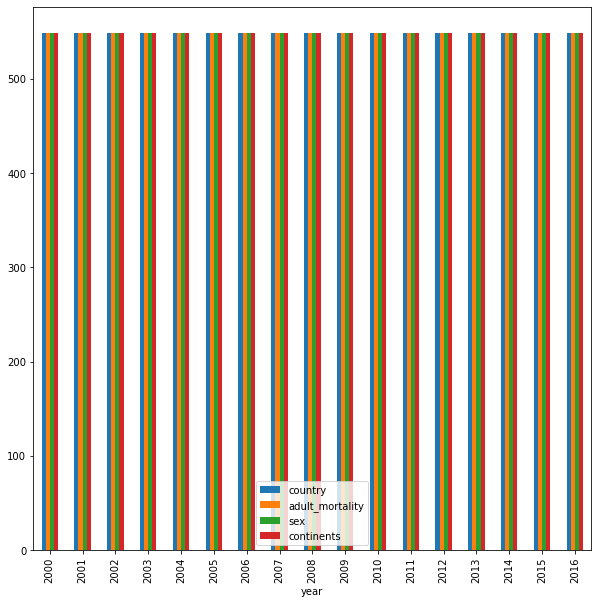

In [85]:
adult_mort_comp.groupby('year').count().plot.bar(figsize = (10,10))

Check same amount of data per year. Distribution is even

## Draw heatmap across mortality rates and year

In [64]:
both_sex_df = combine_df[combine_df.sex == 'Both sexes']

In [65]:
both_sex_df

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death,prob_infant_death,prob_underfivedeath,continents
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2,67.5,Asia
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1,70.4,Asia
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1,73.6,Asia
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3,76.9,Asia
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2,9.3,Europe
...,...,...,...,...,...,...,...,...,...
727,Zambia,2013,Both sexes,311.0,40518.0,27726.0,47.8,70.7,Africa
728,Zimbabwe,2016,Both sexes,334.0,23326.0,16693.0,36.3,50.4,Africa
729,Zimbabwe,2015,Both sexes,346.0,25433.0,18006.0,38.5,54.3,Africa
730,Zimbabwe,2014,Both sexes,358.0,27058.0,19051.0,40.4,57.5,Africa


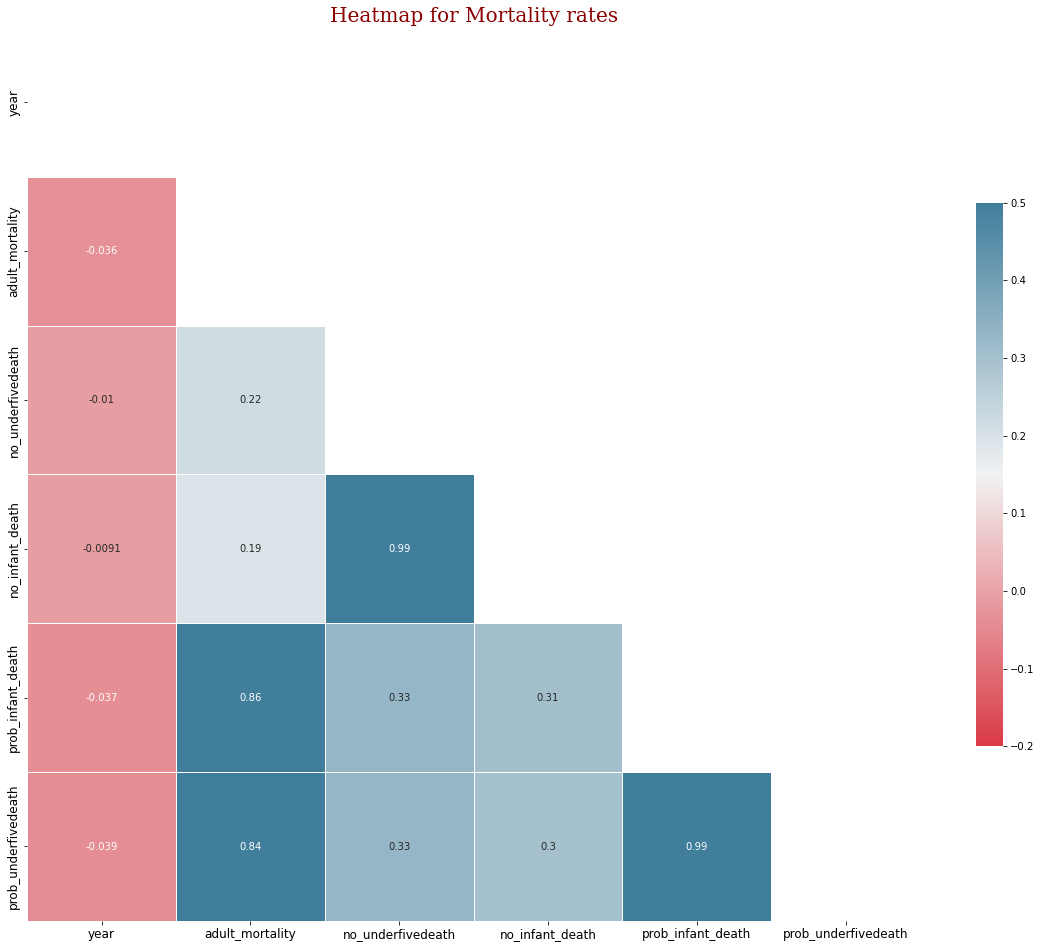

In [66]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(both_sex_df.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 230, as_cmap=True)

# Draw the heatmap_df with the mask and correct aspect ratio
sns.heatmap(both_sex_df.corr(), mask=mask, cmap=cmap, vmax=0.5, vmin = -.2,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot = True)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
plt.title('Heatmap for Mortality rates', fontdict =font)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

**Observations** 
- We can generally see `negative correlation` between years and mortality rates. Across years, both adult mortality rates and probability of infant death or death under 5 yrs old decreases. 
- Adult mortality is `low positive correlation` with death under 5 yrs old (0.19-0.22 positive correlation). This suggest that over the years, amongst the many reasons why there were decreasing/increasing probability of people who dies from the age of 15-60 yrs old, only some developing countries may have bigger proportions of death under 5 yrs old and having similar decreasing/increasing trend, battling on getting the basic means to intervene and prevent common childhood diseases that could potentially save more `young lives` even after 5 years old. 

    Also its low magnitude could be attributed to the fact that we are just considering absolute numbers of child deaths vs adult mortality rates. 

- Adult mortality has `high positive correlation` with probability of infant deaths suggesting that overall if a country has the basic healthcare such as vaccination and nutritions, likely that the rates will fall together.



## Which continent has the lowest and highest mortality rate for both sex?

In [67]:
result = both_sex_df[['country','continents','year','adult_mortality']].groupby(['continents', 'year']).mean()

In [68]:
result = result.reset_index()

In [69]:
result

,continents,year,adult_mortality
0,Africa,2013,272.000000
1,Africa,2014,269.981481
2,Africa,2015,262.685185
3,Africa,2016,256.740741
4,Asia,2013,143.295455
5,Asia,2014,142.704545
6,Asia,2015,139.704545
7,Asia,2016,136.454545
8,Europe,2013,98.380952
9,Europe,2014,96.500000


<AxesSubplot:xlabel='year', ylabel='adult_mortality'>

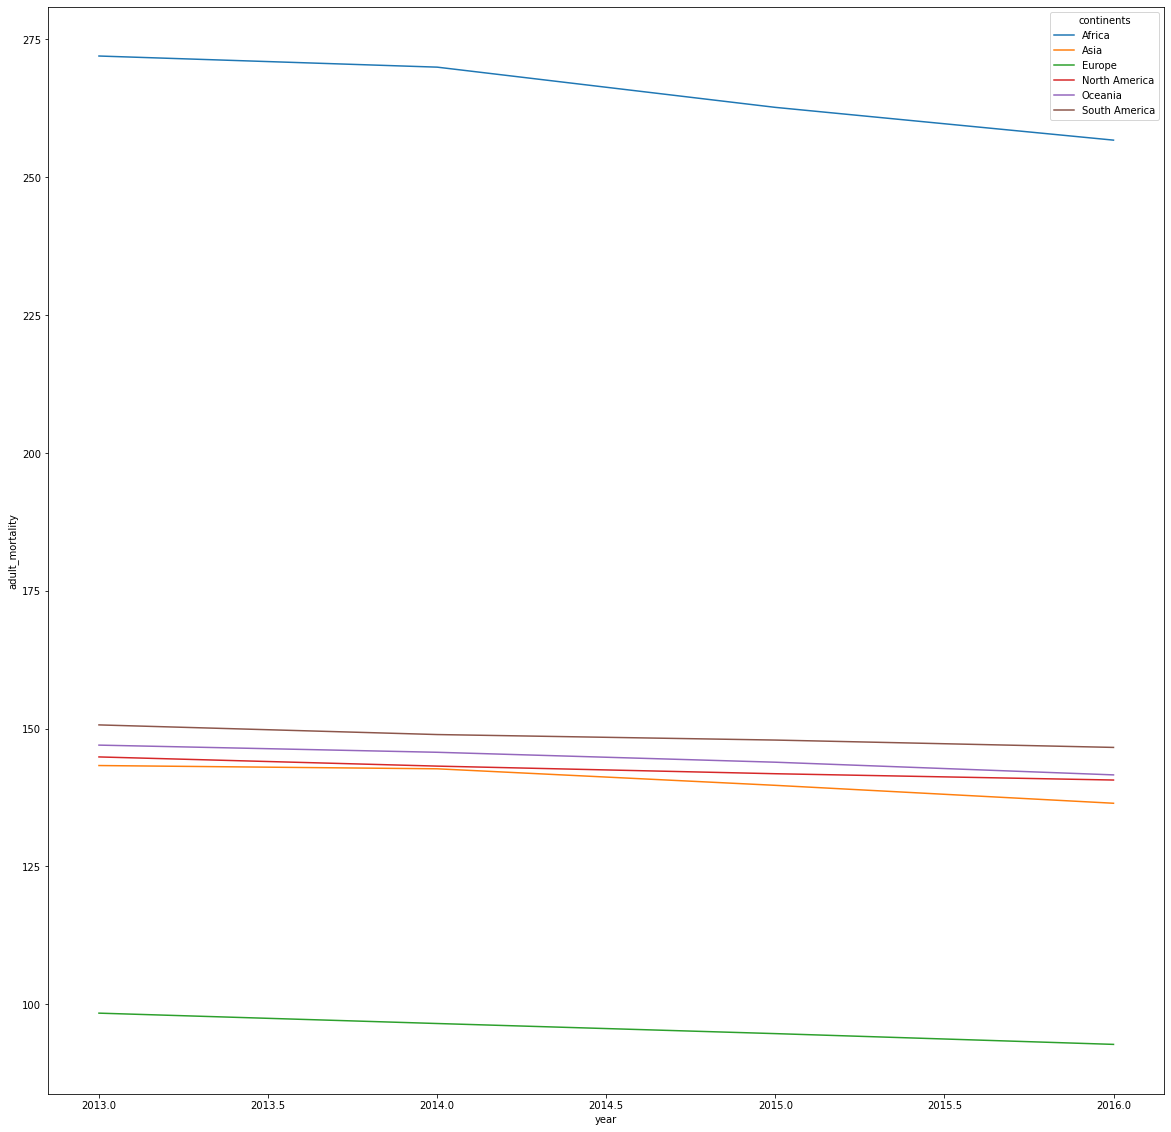

In [70]:
plt.figure(figsize=(20,20))
sns.lineplot(data = result, x = 'year', y = 'adult_mortality', hue = 'continents')

Europe has the least mortality rate while Africa has the highest mortality rates

Overall, there is decreasing trend of adult mortality rate across the years. 

## Show mortality rates for adults for Singapore

In [71]:
singapore_adult_mort = adult_mort_comp[adult_mort_comp.country == 'Singapore']

In [72]:
singapore_adult_mort.head(5)

,country,year,adult_mortality,sex,continents
7446,Singapore,2016,51.0,Both sexes,Asia
7447,Singapore,2015,54.0,Both sexes,Asia
7448,Singapore,2014,55.0,Both sexes,Asia
7449,Singapore,2013,56.0,Both sexes,Asia
7450,Singapore,2012,57.0,Both sexes,Asia


Text(0, 0.5, 'Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn')

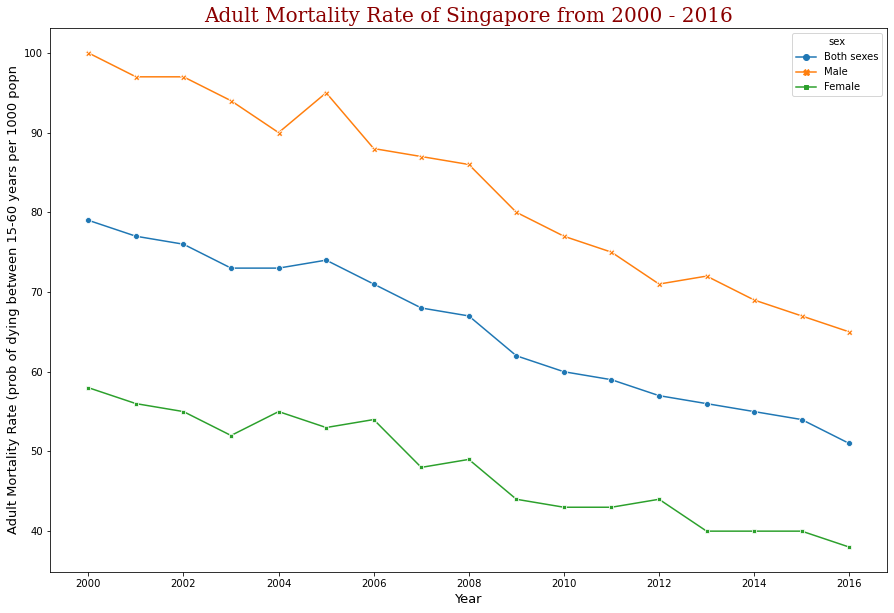

In [73]:
plt.figure(figsize = (15,10))
sns.lineplot(data = singapore_adult_mort, x = 'year', y = 'adult_mortality', hue = 'sex', style = 'sex',markers=True, dashes=False)
plt.title('Adult Mortality Rate of Singapore from 2000 - 2016', fontdict = font)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn', fontsize = 13)

In [74]:
filter_year2000 = singapore_adult_mort[(singapore_adult_mort.year == 2000)][['adult_mortality','sex']]

In [75]:
singapore_adult_mort = singapore_adult_mort.merge(filter_year2000, on  = 'sex', suffixes =('_current', '_year_2000'))

In [76]:
singapore_adult_mort['Prct_change_since_2000'] = (singapore_adult_mort['adult_mortality_current'] - singapore_adult_mort['adult_mortality_year_2000']) / singapore_adult_mort['adult_mortality_year_2000'] * 100

In [77]:
singapore_adult_mort[singapore_adult_mort.year == 2016]

,country,year,adult_mortality_current,sex,continents,adult_mortality_year_2000,Prct_change_since_2000
0,Singapore,2016,51.0,Both sexes,Asia,79.0,-35.443038
17,Singapore,2016,65.0,Male,Asia,100.0,-35.000000
34,Singapore,2016,38.0,Female,Asia,58.0,-34.482759


Over the past 16 years since 2000 to 2016, Singapore has seen a drop of 35% and 34.5% Mortality rate for both male and females respectively.

This translates to a significant drop of 2.2% each year. Seems like both men and women enjoy the same improvement in terms of health as measured by the percentage reduction

## Top 10 Country with Biggest decrease mortality rates over 2000 to 2016 

In [178]:
filter_year2000_all = adult_mort_comp[(adult_mort_comp.year == 2000)][['country','adult_mortality','sex']]

In [179]:
filter_year2000_all

,country,adult_mortality,sex
16,Afghanistan,316.0,Both sexes
33,Afghanistan,340.0,Male
50,Afghanistan,290.0,Female
67,Albania,106.0,Both sexes
84,Albania,133.0,Male
...,...,...,...
9264,Zambia,625.0,Male
9281,Zambia,566.0,Female
9298,Zimbabwe,675.0,Both sexes
9315,Zimbabwe,715.0,Male


In [180]:
all_filtered_adultmort = adult_mort_comp.merge(filter_year2000_all, on  = ['country','sex'], suffixes =('_current', '_year_2000'))
all_filtered_adultmort

,country,year,adult_mortality_current,sex,continents,adult_mortality_year_2000
0,Afghanistan,2016,245.0,Both sexes,Asia,316.0
1,Afghanistan,2015,233.0,Both sexes,Asia,316.0
2,Afghanistan,2014,234.0,Both sexes,Asia,316.0
3,Afghanistan,2013,235.0,Both sexes,Asia,316.0
4,Afghanistan,2012,242.0,Both sexes,Asia,316.0
...,...,...,...,...,...,...
9328,Zimbabwe,2004,670.0,Female,Africa,640.0
9329,Zimbabwe,2003,671.0,Female,Africa,640.0
9330,Zimbabwe,2002,667.0,Female,Africa,640.0
9331,Zimbabwe,2001,656.0,Female,Africa,640.0


In [181]:
all_filtered_adultmort = combine_df.merge(filter_year2000_all, on  = ['country','sex'], suffixes =('_current', '_year_2000'))
all_filtered_adultmort

,country,year,sex,adult_mortality_current,no_underfivedeath,no_infant_death,prob_infant_death,prob_underfivedeath,continents,adult_mortality_year_2000
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2,67.5,Asia,316.0
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1,70.4,Asia,316.0
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1,73.6,Asia,316.0
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3,76.9,Asia,316.0
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2,9.3,Europe,106.0
...,...,...,...,...,...,...,...,...,...,...
2191,Zambia,2013,Female,277.0,18411.0,12415.0,43.4,65.1,Africa,566.0
2192,Zimbabwe,2016,Female,303.0,10459.0,7297.0,32.0,45.5,Africa,640.0
2193,Zimbabwe,2015,Female,314.0,11432.0,7885.0,34.0,49.2,Africa,640.0
2194,Zimbabwe,2014,Female,328.0,12192.0,8344.0,35.6,52.3,Africa,640.0


In [182]:
# include percentage change since 2000 column
all_filtered_adultmort['Prct_change_since_2000'] = (all_filtered_adultmort['adult_mortality_current'] - all_filtered_adultmort['adult_mortality_year_2000']) / all_filtered_adultmort['adult_mortality_year_2000'] * 100

In [183]:
# considering all countries from 2016, both sexes only 

all_filtered_adultmort = all_filtered_adultmort[(all_filtered_adultmort.year == 2016) & (all_filtered_adultmort.sex == 'Both sexes')]

In [184]:
all_filtered_adultmort = all_filtered_adultmort.merge(maternal_mortality[['maternal_ratio','country','year']], on = ['country','year'])

In [130]:
all_filtered_adultmort.sort_values(by = 'Prct_change_since_2000', ascending = True).head(10)

,country,year,sex,adult_mortality_current,no_underfivedeath,no_infant_death,prob_infant_death,prob_underfivedeath,continents,adult_mortality_year_2000,Prct_change_since_2000,maternal_ratio
101,Maldives,2016,Both sexes,53.0,70.0,60.0,8.1,9.5,Asia,142.0,-62.676056,54
21,Botswana,2016,Both sexes,249.0,2216.0,1818.0,32.3,39.4,Africa,601.0,-58.569052,151
53,Eritrea,2016,Both sexes,252.0,4836.0,3540.0,33.1,44.9,Africa,600.0,-58.000000,498
110,Morocco,2016,Both sexes,69.0,17036.0,14606.0,20.9,24.4,Africa,159.0,-56.603774,72
136,Rwanda,2016,Both sexes,198.0,14374.0,10976.0,29.3,38.8,Africa,451.0,-56.097561,260
99,Malawi,2016,Both sexes,255.0,33193.0,22957.0,38.3,55.7,Africa,535.0,-52.336449,358
86,Kenya,2016,Both sexes,219.0,65008.0,47383.0,32.4,44.4,Africa,458.0,-52.183406,346
181,Zambia,2016,Both sexes,286.0,36976.0,25924.0,43.1,62.0,Africa,594.0,-51.851852,222
182,Zimbabwe,2016,Both sexes,334.0,23326.0,16693.0,36.3,50.4,Africa,675.0,-50.518519,468
77,Iran (Islamic Republic of),2016,Both sexes,80.0,23162.0,20064.0,13.3,15.5,Asia,153.0,-47.712418,16


We see that the spread of how a country is developed or developing is wide

We need to set a scope as to which countries we should zoom into. Start by looking at the top 10 countries with least adult mortality rates in 2016

## Top 10 countries with lowest mortality rates

In [132]:
# getting countries with least adult mortality rates 
top10_mortality = adult_mort_comp[(adult_mort_comp.year == 2016) & (adult_mort_comp.sex == 'Both sexes')].sort_values(by = 'adult_mortality').head(10)
top10_mortality

,country,year,adult_mortality,sex,continents
8058,Switzerland,2016,49.0,Both sexes,Europe
7446,Singapore,2016,51.0,Both sexes,Asia
4233,Japan,2016,51.0,Both sexes,Asia
8007,Sweden,2016,52.0,Both sexes,Europe
5151,Maldives,2016,53.0,Both sexes,Asia
4131,Italy,2016,54.0,Both sexes,Europe
5253,Malta,2016,55.0,Both sexes,Europe
2142,Cyprus,2016,55.0,Both sexes,Europe
3774,Iceland,2016,55.0,Both sexes,Europe
6120,Norway,2016,55.0,Both sexes,Europe


In [341]:
# filter off only top 10 countries based on mortality rates for both sex first
country_list = top10_mortality.country.tolist()


In [364]:
# define function that takes in which sex category for filtering 

def filter_sex(df,which_sex, year):
    # getting countries with least adult mortality rates 
    df_top10 = df[(df.year == year) & (df.sex == which_sex) & (df.country != 'Maldives') ].sort_values(by = 'adult_mortality').head(10)
    
    #generate list for countries 
    country_list = df_top10.country.tolist()

    # filter countries in list 
    df_new = df[(df['country'].isin(country_list) & (df.sex == which_sex))]

    # filter off singapore in another column for line separation 
    df_new.loc[:,'filter_sg'] = df_new.loc[:,'country'].apply(lambda x: 'SG' if x == 'Singapore' else 'Other country')

    return df_new


In [365]:
top10_mortality_male = filter_sex(adult_mort_comp,'Male', 2016)
top10_mortality_male.sort_values(by = ['year','adult_mortality'], ascending = [False,True]).head(10)

c:\Users\Admin\.conda\envs\dsi27tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,country,year,adult_mortality,sex,continents,filter_sg
578,Bahrain,2016,61.0,Male,Asia,Other country
8075,Switzerland,2016,62.0,Male,Europe,Other country
8024,Sweden,2016,64.0,Male,Europe,Other country
4250,Japan,2016,65.0,Male,Asia,Other country
7463,Singapore,2016,65.0,Male,Asia,SG
5882,Netherlands,2016,66.0,Male,Europe,Other country
6137,Norway,2016,66.0,Male,Europe,Other country
6647,Qatar,2016,66.0,Male,Asia,Other country
3791,Iceland,2016,67.0,Male,Europe,Other country
4148,Italy,2016,68.0,Male,Europe,Other country


In [376]:
top10_mortality_male[top10_mortality_male.country == 'Singapore']

,country,year,adult_mortality,sex,continents,filter_sg
7463,Singapore,2016,65.0,Male,Asia,SG
7464,Singapore,2015,67.0,Male,Asia,SG
7465,Singapore,2014,69.0,Male,Asia,SG
7466,Singapore,2013,72.0,Male,Asia,SG
7467,Singapore,2012,71.0,Male,Asia,SG
7468,Singapore,2011,75.0,Male,Asia,SG
7469,Singapore,2010,77.0,Male,Asia,SG
7470,Singapore,2009,80.0,Male,Asia,SG
7471,Singapore,2008,86.0,Male,Asia,SG
7472,Singapore,2007,87.0,Male,Asia,SG


In [366]:
top10_mortality_female = filter_sex(adult_mort_comp,'Female', 2016, country_list)
top10_mortality_female.sort_values(by = ['year','adult_mortality'], ascending = [False,True]).head(10)

c:\Users\Admin\.conda\envs\dsi27tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,country,year,adult_mortality,sex,continents,filter_sg
4267,Japan,2016,36.0,Female,Asia,Other country
6715,Republic of Korea,2016,36.0,Female,Asia,Other country
8092,Switzerland,2016,36.0,Female,Europe,Other country
2176,Cyprus,2016,37.0,Female,Europe,Other country
4981,Luxembourg,2016,38.0,Female,Europe,Other country
5287,Malta,2016,38.0,Female,Europe,Other country
7480,Singapore,2016,38.0,Female,Asia,SG
7837,Spain,2016,38.0,Female,Europe,Other country
4165,Italy,2016,39.0,Female,Europe,Other country
8041,Sweden,2016,40.0,Female,Europe,Other country


In [373]:
top10_mortality_female[top10_mortality_female.country == 'Singapore']

,country,year,adult_mortality,sex,continents,filter_sg
7480,Singapore,2016,38.0,Female,Asia,SG
7481,Singapore,2015,40.0,Female,Asia,SG
7482,Singapore,2014,40.0,Female,Asia,SG
7483,Singapore,2013,40.0,Female,Asia,SG
7484,Singapore,2012,44.0,Female,Asia,SG
7485,Singapore,2011,43.0,Female,Asia,SG
7486,Singapore,2010,43.0,Female,Asia,SG
7487,Singapore,2009,44.0,Female,Asia,SG
7488,Singapore,2008,49.0,Female,Asia,SG
7489,Singapore,2007,48.0,Female,Asia,SG


Text(0, 0.5, 'Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn')

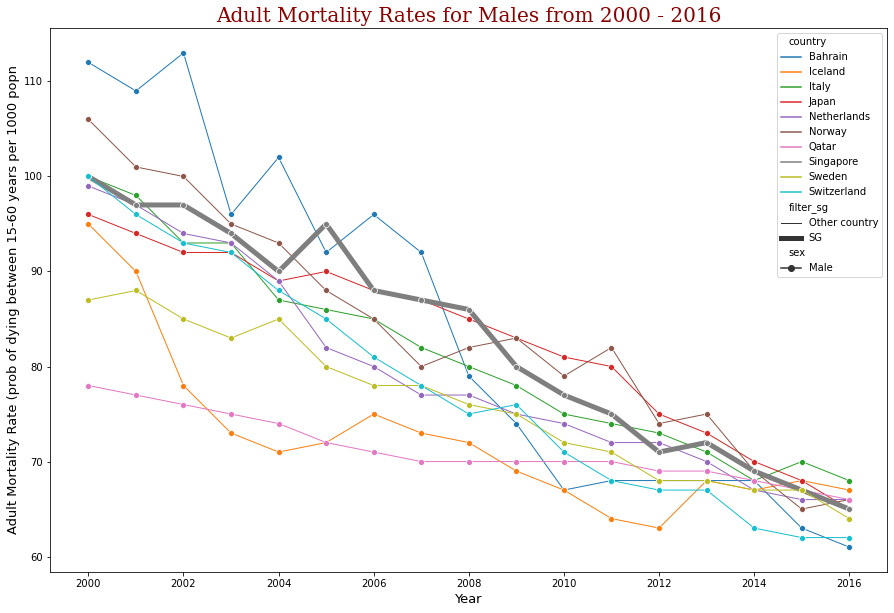

In [367]:
# Plotting for male

plt.figure(figsize = (15,10))
sns.lineplot(data = top10_mortality_male, x = 'year', y = 'adult_mortality', hue = 'country', style = 'sex',markers=True, dashes=False, size = 'filter_sg', sizes = {'SG': 5, 'Other country': 1})
plt.title('Adult Mortality Rates for Males from 2000 - 2016', fontdict = font)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn', fontsize = 13)

Text(0, 0.5, 'Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn')

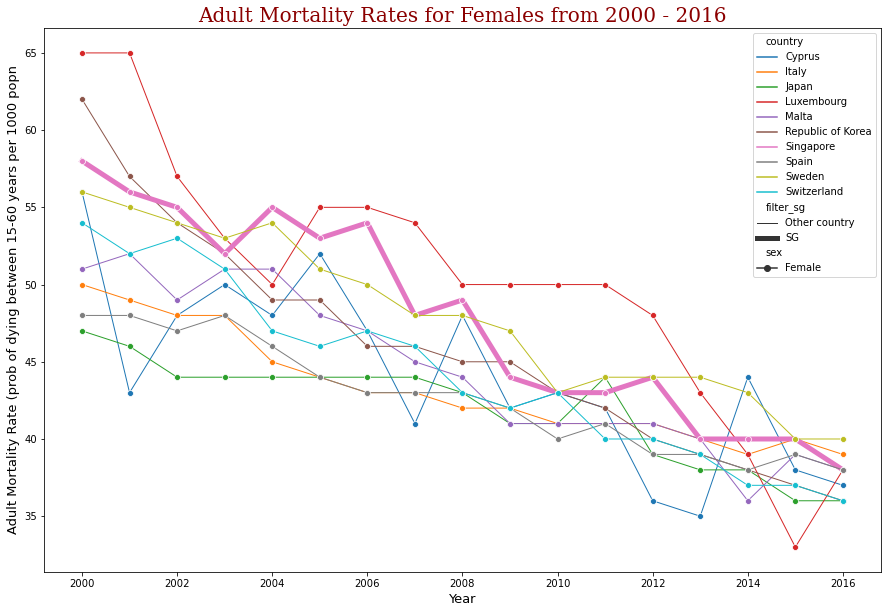

In [370]:
# Plotting for female

plt.figure(figsize = (15,10))
sns.lineplot(data = top10_mortality_female, x = 'year', y = 'adult_mortality', hue = 'country', style = 'sex',markers=True, dashes=False, size = 'filter_sg', sizes = {'SG': 5, 'Other country': 1})
plt.title('Adult Mortality Rates for Females from 2000 - 2016', fontdict = font)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn', fontsize = 13)

On 2016, Singapore is ranked `6th place` for having lowest `male` adult mortality while ranking `7th place` for having lowest `female` adult mortality rate. 

For Singapore, the study suggests a **relatively steady decline of about 2.1-2.2% each year over the span of 16 year** for both men and women. 

There is **comparatively steeper improvement of Males in Singapore**, whereby for every 1000 population, the number of deaths decreased from 100 to 65, -2.2% decrease as compared most of the other top few countries. For example, Iceland has a decline in adult mortality of about -1.8% per year. 

## Under-five mortality rate (deaths per 1000 live births) from 2013 to 2016

I will like to include comparison across `continents`, `Singapore`, and `Worldwide`

In [215]:
combine_df.year.unique()

array([2016, 2015, 2014, 2013], dtype=int64)

In [220]:
# filter out sex == Both sex
udr5_bothsex = combine_df[(combine_df.sex == 'Both sexes')]
udr5_bothsex

,country,year,sex,adult_mortality,no_underfivedeath,no_infant_death,prob_infant_death,prob_underfivedeath,continents
0,Afghanistan,2016,Both sexes,245.0,79770.0,60673.0,51.2,67.5,Asia
1,Afghanistan,2015,Both sexes,233.0,82918.0,62652.0,53.1,70.4,Asia
2,Afghanistan,2014,Both sexes,234.0,86378.0,64808.0,55.1,73.6,Asia
3,Afghanistan,2013,Both sexes,235.0,90103.0,67154.0,57.3,76.9,Asia
4,Albania,2016,Both sexes,96.0,326.0,289.0,8.2,9.3,Europe
...,...,...,...,...,...,...,...,...,...
727,Zambia,2013,Both sexes,311.0,40518.0,27726.0,47.8,70.7,Africa
728,Zimbabwe,2016,Both sexes,334.0,23326.0,16693.0,36.3,50.4,Africa
729,Zimbabwe,2015,Both sexes,346.0,25433.0,18006.0,38.5,54.3,Africa
730,Zimbabwe,2014,Both sexes,358.0,27058.0,19051.0,40.4,57.5,Africa


In [248]:
udr5_continents = udr5_bothsex.groupby(['continents','year']).mean()[['prob_underfivedeath']].reset_index()
udr5_continents = udr5_continents.sort_values(by = 'prob_underfivedeath', ascending = False)
udr5_continents

,continents,year,prob_underfivedeath
0,Africa,2013,73.144444
1,Africa,2014,70.446296
2,Africa,2015,67.950000
3,Africa,2016,65.492593
16,Oceania,2013,27.320000
17,Oceania,2014,26.780000
18,Oceania,2015,26.220000
19,Oceania,2016,25.630000
4,Asia,2013,25.556818
5,Asia,2014,24.561364


In [261]:
# get dataframe for singapore
udr5_sg = udr5_bothsex[udr5_bothsex.country == 'Singapore'][['country','year','prob_underfivedeath']]
udr5_sg.columns = ['continents','year','prob_underfivedeath']
udr5_sg

,continents,year,prob_underfivedeath
584,Singapore,2016,2.7
585,Singapore,2015,2.7
586,Singapore,2014,2.7
587,Singapore,2013,2.7


In [263]:
# get dataframe for world 

udr5_world = udr5_bothsex.groupby('year').mean().reset_index()[['year','prob_underfivedeath']]
udr5_world['country'] = 'World'
udr5_world.columns = ['year','prob_underfivedeath','continents']

In [267]:
combine_udr5 = pd.concat([udr5_continents,udr5_sg,udr5_world], axis = 0).rename(columns = {'continents': 'AreaOfInterest'})
combine_udr5

,AreaOfInterest,year,prob_underfivedeath
0,Africa,2013,73.144444
1,Africa,2014,70.446296
2,Africa,2015,67.950000
3,Africa,2016,65.492593
16,Oceania,2013,27.320000
17,Oceania,2014,26.780000
18,Oceania,2015,26.220000
19,Oceania,2016,25.630000
4,Asia,2013,25.556818
5,Asia,2014,24.561364


In [290]:
# round up to 1 decimal place
combine_udr5.prob_underfivedeath = combine_udr5.prob_underfivedeath.apply(lambda x: round(x,1))
combine_udr5

,AreaOfInterest,year,prob_underfivedeath
0,Africa,2013,73.1
1,Africa,2014,70.4
2,Africa,2015,68.0
3,Africa,2016,65.5
16,Oceania,2013,27.3
17,Oceania,2014,26.8
18,Oceania,2015,26.2
19,Oceania,2016,25.6
4,Asia,2013,25.6
5,Asia,2014,24.6


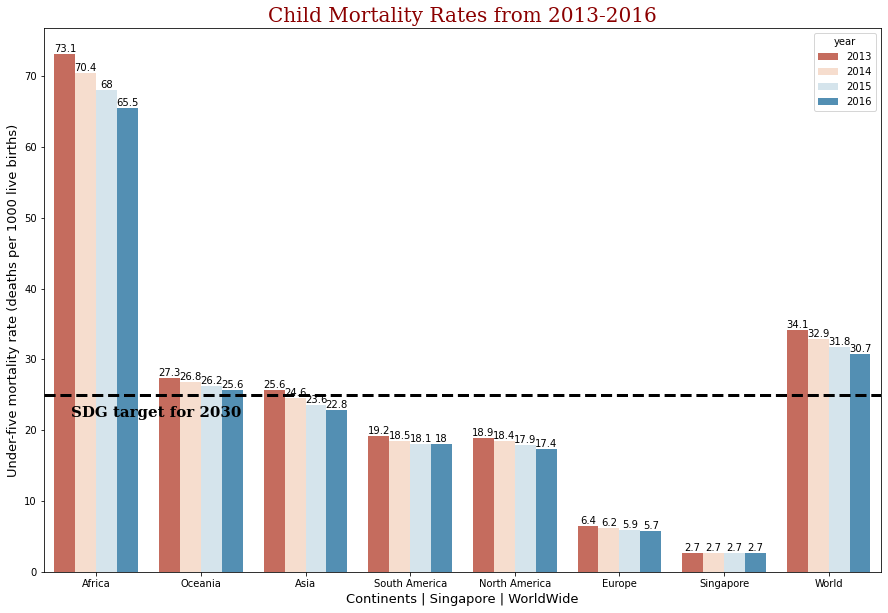

In [338]:
# filter off only top 10 countries
plt.figure(figsize = (15,10))

# set pallete colour 
pal1 = sns.color_palette("RdBu_r", len(combine_udr5['year'].unique()));

# plot barplot 
ax = sns.barplot(data = combine_udr5, x = 'AreaOfInterest', y = 'prob_underfivedeath', hue = 'year', palette=np.array(pal1[::-1]))
plt.title('Child Mortality Rates from 2013-2016', fontdict = font)
plt.ylabel('Under-five mortality rate (deaths per 1000 live births)', fontsize = 13)
plt.xlabel('Continents | Singapore | WorldWide', fontsize = 13)

#Drawing a horizontal line at point 1.25
ax.axhline(25, linewidth = 3, linestyle='--', color = 'black')

font2  = {'family': 'serif',
'color':  'black',
'weight': 'bold',
'size': 15,
}
# plot figure text on WHO line = 25
plt.figtext(x=0.15, y=0.34, s=f"SDG target for 2030", fontdict=font2)

# plot label on top of bars
for i in ax.containers:
    ax.bar_label(i,)

By 2016, most continents have already met the Sustainable Development Goals (SDG) target of at least as low as 25 deaths per 1000 live births by 2030 ([UNICEF](https://data.unicef.org/topic/child-survival/child-survival-sdgs/#:~:text=The%20proposed%20SDG%20target%20for,deaths%20per%201%2C000%20live%20births.))

Comparatively, Singapore has done well in maintaining very low under-five mortality rates as compared to Asia and across the world, suggesting the its effective health care system that are accessible to the majority of the population. According to ([Bloomberg Global Heath](https://www.internationalinsurance.com/health/systems/singapore.php#:~:text=The%20Economist%20Intelligence%20Unit%20placed,extremely%20high%20standard%20of%20living.)) of 163 countries ranked Singapore the `4th healthiest country in the world`. This excellent level of healthcare means that Singaporeans enjoy a substantial amount of standard of living. 

Globally, infectious diseases, including pneumonia, diarrhoea and malaria, along with pre-term birth complications, birth asphyxia and trauma and congenital anomalies remain the leading causes of death for children under five ([WHO](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/child-mortality-and-causes-of-death#:~:text=Globally%2C%20infectious%20diseases%2C%20including%20pneumonia,death%20for%20children%20under%20five.)). 

To curb this, in 1966 Singapore government established a national family planning program. This program, together with nutrition education, improved housing and promotion of breastfeeding has raised the nutrition level.([NIH](https://pubmed.ncbi.nlm.nih.gov/7137909/))

# Export CSV

In [377]:
top10_mortality_female.to_csv('../data/top10_mortality_female.csv')
top10_mortality_male.to_csv('../data/top10_mortality_male.csv')
combine_udr5.to_csv('../data/combined_under5yrsold.csv')

In [378]:
import sqlite3

top10_mortality_female

,country,year,adult_mortality,sex,continents,filter_sg
2176,Cyprus,2016,37.0,Female,Europe,Other country
2177,Cyprus,2015,38.0,Female,Europe,Other country
2178,Cyprus,2014,44.0,Female,Europe,Other country
2179,Cyprus,2013,35.0,Female,Europe,Other country
2180,Cyprus,2012,36.0,Female,Europe,Other country
...,...,...,...,...,...,...
8104,Switzerland,2004,47.0,Female,Europe,Other country
8105,Switzerland,2003,51.0,Female,Europe,Other country
8106,Switzerland,2002,53.0,Female,Europe,Other country
8107,Switzerland,2001,52.0,Female,Europe,Other country
